In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm

WINDOW_SIZE = "1920,1080"

# Options
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)
chrome_options.add_argument('--no-sandbox')
driver = webdriver.Chrome(options=chrome_options)

driver.get("https://typst.app/docs/reference/symbols/sym/")
time.sleep(2)

symbol_grid = driver.find_element(By.CLASS_NAME, "symbol-grid")

list_items = symbol_grid.find_elements(By.TAG_NAME, 'li')

csv_file = open("symbols.csv", "w")

with open("symbols.csv", "w") as csv_file:
    csv_file.write("unic-name, sym, sym-name, unic-name, typ-scape, variants\n")
    for item in tqdm(list_items):
        ActionChains(driver).move_to_element_with_offset(driver.find_element(By.TAG_NAME, "body"), 0, 0).click().perform()

        buttons = item.find_elements(By.TAG_NAME, 'button')
        if buttons:
            WebDriverWait(driver, 10).until(EC.element_to_be_clickable(buttons[0]))
            driver.execute_script("arguments[0].scrollIntoView(true);", buttons[0])
            ActionChains(driver).move_to_element(buttons[0]).click().perform()

            try:
                flyout = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CLASS_NAME, "symbol-flyout"))
                )
            except:
                flyout = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CLASS_NAME, "symbol-flyout.override"))
                )
            
            info = flyout.find_element(By.CLASS_NAME, "info")
            variants_box = flyout.find_element(By.CLASS_NAME, "variants-box")

            unic_name = info.find_element(By.CLASS_NAME, "unic-name").text
            sym = item.find_element(By.CLASS_NAME, "sym").text
            sym_name = info.find_element(By.CLASS_NAME, "sym-name").text.split(' ')[-1]
            typ_escape = info.find_element(By.CLASS_NAME, "typ-escape").text
            variants = variants_box.text if variants_box.is_displayed() else ""
            if variants:
                variants = variants.replace("\n", " ")
                variants = variants[variants.find("Variants") + len("Variants") + 1:]

            csv_file.write(', '.join([unic_name, sym, sym_name, unic_name, typ_escape, variants]) + "\n")

    driver.quit()

100%|██████████| 841/841 [09:10<00:00,  1.53it/s]


In [51]:
import pandas as pd
from tqdm import tqdm
from PIL import Image, ImageDraw, ImageFont

label_dir = "../data/typst/digital/labels.csv"
img_dir = "../data/typst/digital/img/"

df = pd.read_csv("../data/typst/raw/symbols.csv")

codes = df[" sym-name"]
escapes = df[" typ-escape"]

font = ImageFont.truetype("DejaVuSans.ttf", 48)

with open(label_dir, "w") as f:
    f.write("index,code\n")
    for i, (code, escape) in tqdm(enumerate(zip(codes, escapes))):
        f.write(f"{i},{code}\n")
        escape = chr(int(escape[4:8], 16))

        # Create image with white background
        img = Image.new('RGB', (64, 64), color=(255, 255, 255))
        d = ImageDraw.Draw(img)

        # Add text to image
        d.text((8, 8), escape, fill=(0, 0, 0), font=font)

        # Save image
        img.save(f"{img_dir}{i}.png")


841it [00:00, 3374.24it/s]


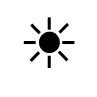

In [ ]:
import matplotlib.pyplot as plt

# Given Unicode escape code, for example "\u2600" which represents the sun
unicode_escape_code = "\u2600"

# Create a figure to display the symbol
plt.figure(figsize=(1, 1))
plt.text(0.5, 0.5, unicode_escape_code, fontsize=50, ha='center', va='center')
plt.axis('off') # Turn off axis
plt.show()
